# Исследование данных об аренде самокатов

Цель проекта - проверка некоторых гипотез о работе сервиса аренды самокатов GoFast. Набор данных состоит из 3 таблиц, содержащих данные о клиентах сервиса, поездках с использованием услуг сервиса и ценовой политикой сервиса. Помимо проверки гипотез в ходе проекта предстоит произвести анализ полученных данных и сделать выводы.

Исходный данные представляют собой 3 таблицы с данными о пользователях, поездках и подписках. 
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует
    * стоимость одной минуты поездки — 8 рублей
    * стоимость старта (начала поездки) — 50 рублей
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц
    * стоимость одной минуты поездки — 6 рублей
    * стоимость старта — бесплатно

Основные этапы проекта включают в себя загрузку данных, предварительную обработку, исследовательский анализ, объединение данных из разных источников, подсчет выручки и проверку гипотез.

На этапе загрузки данных импортируются библиотеки pandas, numpy и scipy. Они необходимы для манипуляции данными. Также на этом этапе загружаются наборы данных `users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`

`users_go.csv` содержит следующую информацию:
* `user_id` - уникальный идентификатор пользователя
* `name`- имя пользователя
* `age` - возраст
* `city` - город
* `subscription_type` - тип подписки (free, ultra)

`rides_go.csv`содержит следующую информацию:
* `user_id` - уникальный идентификатор пользователя
* `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* `date` - дата совершения поездки

`subscriptions_go.csv` содержит следующую информацию:
* `subscription_type` - тип подписки
* `minute_price` - стоимость одной минуты поездки по данной подписке
* `start_ride_price` - стоимость начала поездки
* `subscription_fee` - стоимость ежемесячного платежа


Предобработка данных связана с изменением типа данных в столбцах, поиском дубликатов и пропущенных значений. В ходе предобработки мы должны получить качественные данные с которыми можно работать в дальнейшем.

На этапе исследовательского анализа необходимо построить метрики и визуализировать наш набор данных. Сделать выводы о распределение данных и привести описательные характеристики наборов.

Так как исходный набор данных разделен на 3 таблицы, необходимо произвести объедение данных. Это нужно для удобства проверки гипотез и дальнейшей работы. Объедение наборов данных будут производиться по столбцам содержащим одинаковую информацию, таким как `user_id`

Для бизнеса важны количественные метрики, такие как выручка. Поэтому необходимо посчитать сколько денег приносит каждый пользователь в каждый месяц, с учетом его данных о пользовании сервисом.

На этапе проверки гипотез нам предстоит проверить 4 гипотезы, которые волнуют заказчика исследования.
* Сравнить уровень временных затрат пользователей с подпиской и без
* Подтвердить или опровергнуть гипотезу об оптимальном расстоянии поездки
* Сравнить выручку, которую приносят пользователи с подпиской и без
* Ответить на вопрос о том как проводить тестирование при внедрении новых процессов, чтобы оценить их эффективность

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
rides_data = pd.read_csv('/datasets/rides_go.csv')
sub_data = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
display(users_data.head())
display(rides_data.head())
sub_data

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные загружены корректно

In [4]:
display(users_data.info())
display(rides_data.info())
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Исходя из информации выше можно сделать выводы об отсутствии в данных пропусков. А также о наличии столбца с типом данных object, в котором записана дата. Необходимо изменить тип данных в этом столбце. В остальных столбцах тип данных менять не требуется

#### Шаг 2. Предобработка данных

##### Изменение типов данных

Приведем формат столбца с датами к типу данных `datetime`

In [5]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создание нового столбца

Создадим новый столбец с номером месяца

In [6]:
rides_data['month'] = rides_data['date'].dt.month

In [7]:
display(rides_data['date'].min())
rides_data['date'].max()

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

В наборе данных представлены данные о поездках за период с 1 января 2021 года по 30 декабря 2021 года

##### Поиск дубликатов

In [8]:
display(rides_data.duplicated().sum())
users_data.duplicated().sum()

0

31

Исходя из данных выше можно сделать вывод что в таблице rides_data нет дубликатов. Все значения уникальны. В таблице users_data есть некоторое количество повторяющихся id. Есть предположение что это могут быть дубликаты.

In [9]:
users_data.loc[users_data.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [10]:
users_data.drop_duplicates(inplace=True)
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Дубликаты удалены

##### Поиск пропущенных значений

In [11]:
display(users_data.isna().sum())
display(rides_data.isna().sum())
sub_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

##### Итоги предобработки данных

* Изменен тип данных в столбце с датами
* Добавлен новы столбец с номером месяца
* Обнаружены и исключены дубликаты
* Пропущенных значений не найдено

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

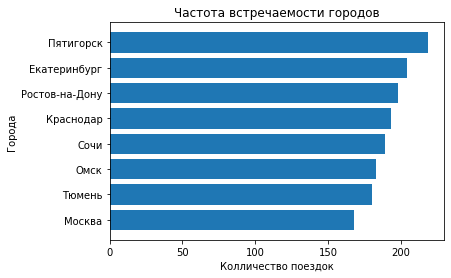

In [12]:
fig, ax = plt.subplots()

data = users_data['city'].value_counts()
x_arr = data.values
y_arr = data.index

ax.barh(y_arr, x_arr)
plt.xlabel("Колличество поездок")
plt.ylabel("Города")
plt.title('Частота встречаемости городов')
ax.invert_yaxis()

users_data['city'].value_counts()

Наиболее встречающийся город в наборе данных это Пятигорск. Меньше всего данных по Москве

##### Соотношение пользователей с подпиской и без подписки

free     835
ultra    699
Name: subscription_type, dtype: int64

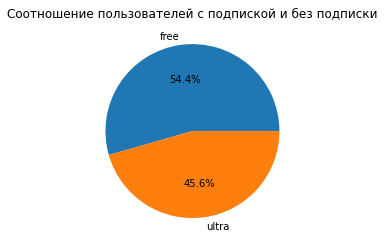

In [13]:
data = users_data['subscription_type'].value_counts()
sizes = data.values
labels = data.index

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')

users_data['subscription_type'].value_counts()

45.6% пользователей имеет подписку ultra

##### Возраст пользователей

Text(0.5, 1.0, 'Возраст пользователей')

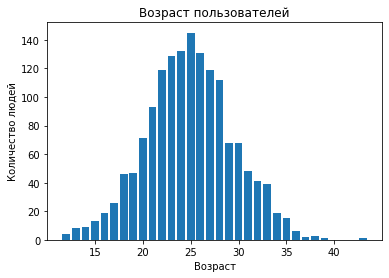

In [14]:
data = users_data['age'].value_counts(sort=False)
age = data.index
value = data.values

fig, ax = plt.subplots()

ax.bar(age, value)
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Возраст пользователей')

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

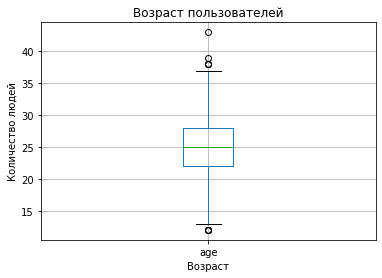

In [15]:
users_data.boxplot(column='age')

plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.title('Возраст пользователей')

users_data['age'].describe()

Распределние возрастов имеет вид нормального распределния с математическим ожиданием равным 25 годам. Половина всех пользователей имеет возраст от 22 до 28 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

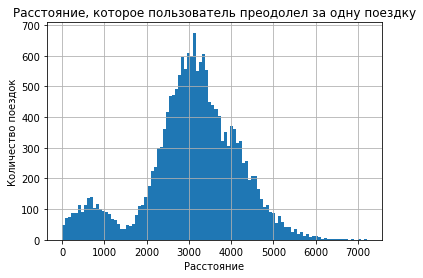

In [16]:
rides_data['distance'].hist(bins=100)

plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')

rides_data['distance'].describe()

count    1796.000000
mean      703.889720
std       368.353542
min         0.855683
25%       414.315810
50%       687.536713
75%       985.430276
max      1499.565830
Name: distance, dtype: float64

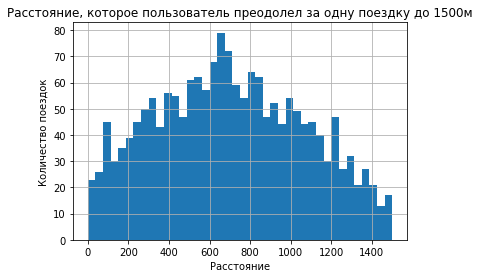

In [17]:
rides_data['distance'].hist(bins=40, range=(0, 1500))

plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь преодолел за одну поездку до 1500м')

rides_data.loc[rides_data['distance'] < 1500, 'distance'].describe()

Данные о расстоянии поездки имеет сложный вид. Два нормальных распределения наложенные друг на друга. Первое распределение от 0 до 1500 м. С локальным пиком в районе 680 м. Второй главный пик находится в районе 3100 м.

Из этого можно сделать вывод, что есть две категории поездок по расстоянию. На короткие и длинные расстояния

Могу предположить что это связано со сценариями использования самокатов. Как городского транспорта "последнего километра" и как транспорт на более дальнее расстояния. Возможно как прогулочный или экскурсионный. Данные гипотезы и предположения требуют отдельного исследования и не буду рассматриваться в рамках данной работы

##### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

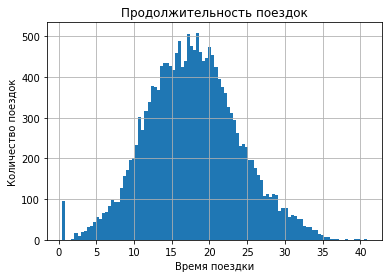

In [18]:
rides_data['duration'].hist(bins=100)

plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок')

rides_data['duration'].describe()

Text(0.5, 1.0, 'Продолжительность поездок')

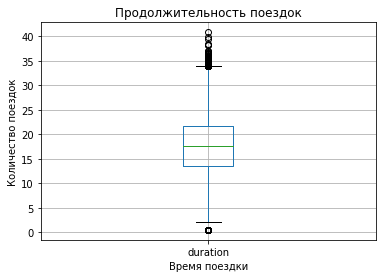

In [19]:
rides_data.boxplot(column='duration')

plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок')

Text(0.5, 1.0, 'Продолжительность поездок до 5 минут')

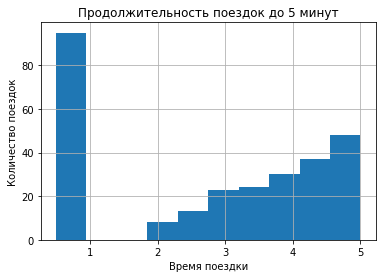

In [20]:
rides_data.loc[rides_data['duration'] < 5, 'duration'].hist(bins=10)
rides_data.loc[rides_data['duration'] < 1, 'duration'].count()

plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок до 5 минут')

Длительность поездки имеет нормальное распределние. Имеет место локальный пик для длительности менее 1 минуты. Предпологаю это связано с арендами которые взяты по ошибке

Text(0.5, 1.0, 'Продолжительность поездок')

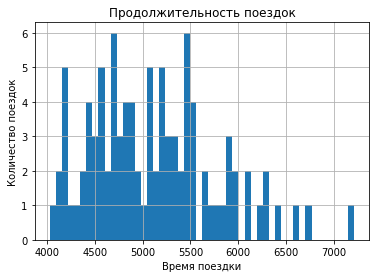

In [21]:
rides_data.query('duration < 1')['distance'].hist(bins=50)
rides_data.query('duration < 1')

plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.title('Продолжительность поездок')

Предположение оказалось некорректным. Имеет место ошибка в учете времени для данных поездок. Так как за время меньше 1 минуты нельзя проехать расстояние более 4000м. Эти данные необходимо исключить

In [22]:
rides_data = rides_data.query('duration > 1')
rides_data

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


##### Итоги исследовательского анализа данных

Данные по поездкам и пользователям были исследованы и описаны. Построены графики распределения значений. Описаны виды распределений. Были выявлены характерные значения. Описаны аномалии в данных и даны гипотезы их возникновения.

#### Шаг 4. Объединение данных

##### Объединение датафреймов

In [23]:
all_data = rides_data.merge(users_data, on='user_id')
all_data = all_data.merge(sub_data, on='subscription_type')
all_data

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
17969,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
17970,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
17971,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [24]:
print('Всего строк в объединённой таблице: ', all_data['user_id'].count())
print('Строк в таблице поездок: ', rides_data['user_id'].count())
print('Строк в таблице пользователей: ', users_data['user_id'].count())

Всего строк в объединённой таблице:  17973
Строк в таблице поездок:  17973
Строк в таблице пользователей:  1534


Количество строк в финальной таблице равно количеству строк в таблице поездок. При объединении ничего не потеряно и не добавлено лишнего.

##### Создание отдельных датафремов с подпиской и без

In [25]:
all_data_ultra = all_data.query('subscription_type == "ultra"')
all_data_ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [26]:
all_data_free = all_data.query('subscription_type == "free"')
all_data_free

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
17969,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
17970,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
17971,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


##### Информация о пользователях с подпиской и без

Из данных выше видно, что пользователи с подпиской совершают меньше поездок чем пользователи без подписки. Визуализируем информацию о расстоянии и времени поездок этих двух групп.

###### С подпиской

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

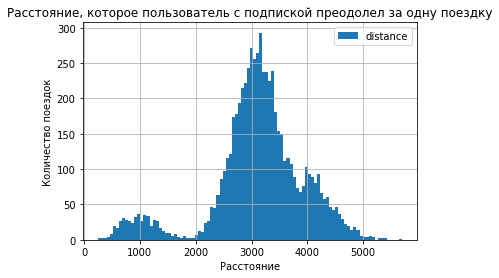

In [27]:
all_data_ultra['distance'].hist(bins=100, legend=True)
all_data_ultra['distance'].describe()

plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку')

all_data_ultra['distance'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

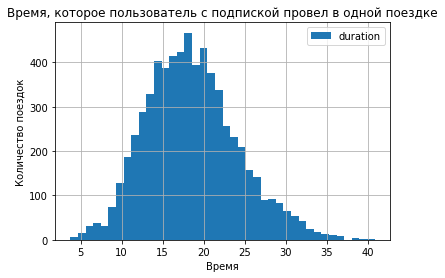

In [28]:
all_data_ultra['duration'].hist(bins=40, legend=True)

plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.title('Время, которое пользователь с подпиской провел в одной поездке')

all_data_ultra['duration'].describe()

Распределение расстояния поездок для пользователей с подпиской отличается от распределения построенного для всех пользователей. К двум локальным пикам добавился третий. Первый пик сместился в район 1000м. Второй остался в районе 3100м. Новый пик образовался в районе 4000м.

Время поездки сохранило свое первоначальное распределение. Пик незначительно сместился. У пользователей с подпиской практически нет поездок длинной меньше минуты.

###### Без подписки

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

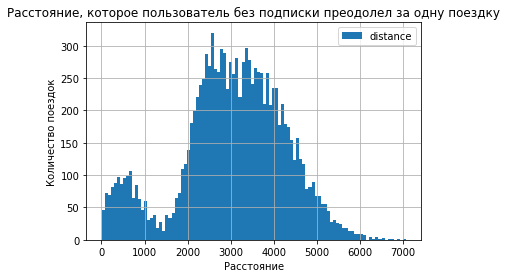

In [29]:
all_data_free['distance'].hist(bins=100, legend=True)

plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку')

all_data_free['distance'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

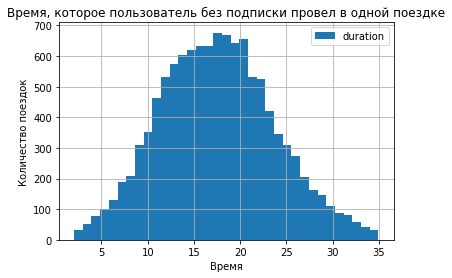

In [30]:
all_data_free['duration'].hist(bins=35, legend=True)

plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.title('Время, которое пользователь без подписки провел в одной поездке')

all_data_free['duration'].describe()

Распределение расстояния поездок для пользователей без подписки не отличается от распределения построенного для всех пользователей. Имеет два пика. Первый пик сместился в район 500м. Второй пик остался в районе 3100м. Присутствует  хвост со значениями до 7200м.

Время поездки сохранило свое первоначальное распределение. Пик незначительно сместился

От наличия подписки незначительно меняется продолжительность поездки, однако распределение расстояние поездок существенно изменяется. Это может говорить о различном поведении этих групп пользователей. Можно предположить что это связано с ценой минуты аренды. Для пользователей с подпиской она ниже, следовательно и первый пик имеет большее значение чем у пользователей без подписки. На второй пик цена минуты аренды уже не оказывает такого существенного влияния.

#### Шаг 5. Подсчёт выручки

##### Агрегированные данные по пользователям и месяцам

Агрегируем данные с использованием сводных таблиц. Для каждого пользователя рассчитаем суммарное расстояние и суммарную длительность поездки в каждом месяце. Также подсчитаем количество поездок в этом месяце. Сделаем это для пользователей с подпиской и без подписки по отдельности.

In [31]:
all_data['duration'] = np.ceil(all_data['duration'])
aggr_all_data = all_data.pivot_table(values=['duration', 'distance', 'subscription_type'],
                                                 index=['user_id', 'month'],
                                                 aggfunc={'duration': 'sum',
                                                          'distance': ['sum', 'count'],
                                                          'subscription_type': 'first'})

aggr_all_data.columns = ['count', 'distance_sum', 'duration_sum', 'subscription_type']
aggr_all_data

count  distance_sum  duration_sum subscription_type
user_id month                                                     
1       1          2   7027.511294          42.0             ultra
        4          1    754.159807           7.0             ultra
        8          2   6723.470560          46.0             ultra
        10         2   5809.911100          32.0             ultra
        11         3   7003.499363          56.0             ultra
...              ...           ...           ...               ...
1534    6          2   3409.468534          26.0              free
        8          2   7622.453034          48.0              free
        9          1   4928.173852          23.0              free
        11         4  13350.015305          78.0              free
        12         1   2371.711192          16.0              free

[11300 rows x 4 columns]

In [32]:
aggr_all_data = aggr_all_data.merge(sub_data, on='subscription_type')
aggr_all_data

,count,distance_sum,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee
0,2,7027.511294,42.0,ultra,6,0,199
1,1,754.159807,7.0,ultra,6,0,199
2,2,6723.470560,46.0,ultra,6,0,199
3,2,5809.911100,32.0,ultra,6,0,199
4,3,7003.499363,56.0,ultra,6,0,199
...,...,...,...,...,...,...,...
11295,2,3409.468534,26.0,free,8,50,0
11296,2,7622.453034,48.0,free,8,50,0
11297,1,4928.173852,23.0,free,8,50,0
11298,4,13350.015305,78.0,free,8,50,0


Добавил в сводную таблицу данные о поездках. Этот способ мне показался проще

#####  Подсчет выручки

Рассчитаем сколько каждый пользователь принес выручки в каждом месяце

Для этого умножим стоимость поездки на их количество, добавим произведение стоимости одной минуты на стоимость поездки и добавим стоимость подписки. Данные о стоимостях приведены ниже


* без подписки
    * абонентская плата отсутствует
    * стоимость одной минуты поездки — 8 рублей
    * стоимость старта (начала поездки) — 50 рублей
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц
    * стоимость одной минуты поездки — 6 рублей
    * стоимость старта — бесплатно

In [33]:
aggr_all_data['income'] = aggr_all_data['duration_sum'] * aggr_all_data['minute_price'] + aggr_all_data['subscription_fee'] + aggr_all_data['count'] * aggr_all_data['start_ride_price']
aggr_all_data

,count,distance_sum,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,income
0,2,7027.511294,42.0,ultra,6,0,199,451.0
1,1,754.159807,7.0,ultra,6,0,199,241.0
2,2,6723.470560,46.0,ultra,6,0,199,475.0
3,2,5809.911100,32.0,ultra,6,0,199,391.0
4,3,7003.499363,56.0,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...
11295,2,3409.468534,26.0,free,8,50,0,308.0
11296,2,7622.453034,48.0,free,8,50,0,484.0
11297,1,4928.173852,23.0,free,8,50,0,234.0
11298,4,13350.015305,78.0,free,8,50,0,824.0


In [34]:
aggr_ultra_data = aggr_all_data.query('subscription_type == "ultra"')
aggr_free_data = aggr_all_data.query('subscription_type == "free"')

display(aggr_ultra_data)
aggr_free_data

,count,distance_sum,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,income
0,2,7027.511294,42.0,ultra,6,0,199,451.0
1,1,754.159807,7.0,ultra,6,0,199,241.0
2,2,6723.470560,46.0,ultra,6,0,199,475.0
3,2,5809.911100,32.0,ultra,6,0,199,391.0
4,3,7003.499363,56.0,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...
4528,1,4072.797406,17.0,ultra,6,0,199,301.0
4529,2,7018.324143,45.0,ultra,6,0,199,469.0
4530,2,6364.861911,31.0,ultra,6,0,199,385.0
4531,1,4707.845501,16.0,ultra,6,0,199,295.0


,count,distance_sum,duration_sum,subscription_type,minute_price,start_ride_price,subscription_fee,income
4533,1,2515.690719,15.0,free,8,50,0,170.0
4534,5,13446.659764,89.0,free,8,50,0,962.0
4535,1,3798.334905,19.0,free,8,50,0,202.0
4536,1,2984.551206,16.0,free,8,50,0,178.0
4537,2,5927.650988,29.0,free,8,50,0,332.0
...,...,...,...,...,...,...,...,...
11295,2,3409.468534,26.0,free,8,50,0,308.0
11296,2,7622.453034,48.0,free,8,50,0,484.0
11297,1,4928.173852,23.0,free,8,50,0,234.0
11298,4,13350.015305,78.0,free,8,50,0,824.0


Разделил данные на поездки с подпиской и без

#### Шаг 6. Проверка гипотез

#####  Гипотеза 1. Тратят ли пользователи с подпиской больше времени на поездки

Формулировка гипотезы: Пользователи с подпиской тратят больше времени в месяц на пользование сервисом. Уровень статистической значимости примем 0.05

Нулевая гипотеза: Между средними значениями времени использования сервиса пользователей с подпиской и без, нет разницы. Они равны

Альтернативная гипотеза: Среднее значение первой генеральной совокупности (время использования пользователями с подпиской) больше среднего значения второй генеральной совокупности (время использования пользователями без подписки)

In [35]:
alpha = 0.05

results = st.ttest_ind(all_data_ultra['duration'], all_data_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Среднее время поездки для пользователей с подпиской: ', round(all_data_ultra['duration'].mean(), 2))
print('Среднее время поездки для пользователей без подписки: ', round(all_data_free['duration'].mean(), 2))

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу
Среднее время поездки для пользователей с подпиской:  18.54
Среднее время поездки для пользователей без подписки:  17.53


Отвергаем нулевую гипотезу. Пользователи с подпиской вероятно проводят больше времени в поездках, чем пользователи без подписки. Это подтверждается истиными среднеми значениями из исходных данных.

#####  Гипотеза 2. Оптимальное расстояние поездки

Формулировка гипотезы: Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Уровень статистической значимости примем 0.05

Нулевая гипотеза: Среднее значение расстояния поездок пользователей с подписокой равно 3130 метров.

Альтернативная гипотеза: Среднее значение расстояния поездок пользователей с подписокой больше 3130 метров.

In [36]:
interested_value = 3130
alpha = 0.05

results = st.ttest_1samp(all_data_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

round(all_data_ultra['distance'].mean(), 2)

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


3115.45

Не получилось отвергнуть нулевую гипотезу. Однако это не значит что она истина. Пользователи с подпиской вероятно в среднем проезжают 3130 м. Это подтверждает истиное среднее значение дальности поездок для пользователей с подпиской 

#####  Гипотеза 3. Сравнение выручки

Формулировка гипотезы: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Уровень статистической значимости примем 0.05

Нулевая гипотеза: Среднее значение помесячной выручки от пользователей с подпиской по месяцам равна выручке от пользователей без подписки

Альтернативная гипотеза: Среднее значение помесячной выручки от пользователей с подпиской по месяцам больше выручки от пользователей без подписки

In [37]:
alpha = 0.05

results = st.ttest_ind(aggr_ultra_data['income'], aggr_free_data['income'], alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print('Средняя выручка для пользователей с подпиской: ', round(aggr_ultra_data['income'].mean()))
print('Средняя выручка для пользователей без подписки: ', round(aggr_free_data['income'].mean()))

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу
Средняя выручка для пользователей с подпиской:  363
Средняя выручка для пользователей без подписки:  329


Отвергаем нулевую гипотезу в пользу альтернативной. Выручка от пользователей с подпиской и без точно не ровна. Вероятно пользователи с подпиской приносят больше выручки чем пользователи без. Это подтверждают истенные средние значения для выручки с подпиской и без

#####  Гипотеза 4. Вопрос о типе теста

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В этом случае мы будем проверять равны ли совокупности до и после внедрения изменений. Нулевая гипотеза будет сформулирована так: "Среднее значение количество обращений от пользователя в месяц до обновления сервера равно этому же количеству после обновления сервера." Альтернативная гипотеза: "Среднее значение количество обращений от пользователя в месяц до обновления сервера больше этого же количество после обновления сервера."

Для технической реализации используется метод `scipy.stats.ttest_rel()` с аргументом `alternative='greater'`

#### Общий вывод

Целью проекта была проверка некоторых гипотез о работе сервиса аренды самокатов GoFast. А также анализ данных полученных данных и формирование выводов о поведении пользователей сервиса и их поездках.

В ходе проекта были обработаны и проанализированы данные работы сервиса по аренде электро самокатов.
Произведена предобработка данных в ходе которой:
* Изменен тип данных в столбце с датами
* Добавлен новы столбец с номером месяца
* Обнаружены и исключены дубликаты
* Пропущенных значений не найдено
* Диапазон предоставленных данных охватывает период с 1 января 2021 года по 30 декабря 2021 года

Также произведен исследовательский анализ данных в ходе которого:
* Данные по поездкам и пользователям были исследованы и описаны
* Построены графики распределения значений
* Описаны виды распределений 
* Были выявлены характерные значения
    * Самый распространенный город - Пятигорск. Данные приведены по 8 городам
    * 45,6% пользователей имеют подписку
    * Среднее возраст пользователя - 25 лет
    * Среднее расстояние за поездку - около 700 и 3000м. Два локальных пика. Могу предположить что это связано со сценариями использования самокатов. Как городского транспорта "последнего километра" и как транспорт на более дальнее расстояния.
    * Средняя продолжительность поездок - 17 минут
* Описаны аномалии в данных и даны гипотезы их возникновения. Исключены не корректные данные связанные с ошибками во времени аренды


Данные из разных таблиц были объеденины в общий массив. Также были созданы отдельные массивы данных для поездок пользователей с подпиской и без. В ходе сравнения информации о пользователях с подпиской и без были выявлены следующие закономерности:
* Среднее время использования сервиса для пользователей с подпиской и без, не имеет существенного различия
* Распределение дальности поездок для пользователей с подпиской и без, имеет два локальных пика. Пики для каждой из категорий пользователей смещены относительно общих средних значений. Можно предположить что это связано с ценой минуты аренды. Для пользователей с подпиской она ниже, следовательно, и первый пик имеет большее значение чем у пользователей без подписки. На второй Пик цена аренды уже не оказывает такого существенного влияния.

Далее были произведены расчеты выручки для сервиса по месяцам от каждой поездки с учетом наличия у пользователей подписки. В результате были сформированы 3 таблицы. Общая и две отдельные на каждую категорию пользователей (с подпиской и без)

И наконец проверены 4 гипотезы со следующими выводами:
* Пользователи с подпиской вероятно проводят больше времени в поездках, чем пользователи без подписки. Это подтверждается истинными средними значениями.
* Пользователи с подпиской вероятно в среднем проезжают 3130 м. Это подтверждается истинным средним значением.
* Вероятно пользователи с подпиской приносят больше выручки чем пользователи без. Это подтверждают истинные средние значения для выручки с подпиской и без.
* Приведен развернутый ответ на вопрос о типе теста для проверки гипотезы об улучшении качества услуги после внедрения изменения.

В результате проведенного исследования можно сделать вывод, что пользователи с подпиской незначительно выгоднее для бизнеса с точки зрения приносимой выручки. При очень близки значениях среднего расстояния поездки и времени поездки. Имеет смысл увеличивать количество пользователей с подпиской